# Analyzing Bike-Sharing Patterns in Chicago

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
pd.options.mode.chained_assignment = None  # ignore SettingWithCopyWarning
pd.options.mode.use_inf_as_na = True  # ignore RuntimeWarning

station_name: Streeter Dr & Grand Ave


Text(0, 0.5, 'Number of Bikes')

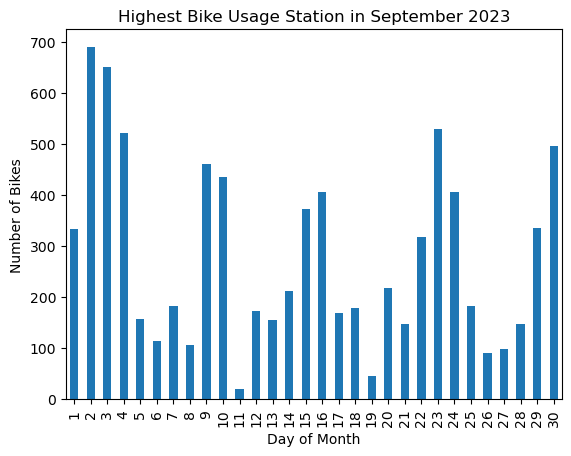

In [3]:
df_202309 = pd.read_csv('data_2023/202309-divvy-tripdata.csv')
df_202309['start_station_name'].value_counts().head()

station_name = df_202309['start_station_name'].value_counts().index[0]
print(f'station_name: {station_name}')

station_trips = df_202309[df_202309['start_station_name'] == station_name]
station_trips['day_of_month'] = pd.to_datetime(station_trips['started_at']).dt.day
trips_per_day = station_trips.groupby('day_of_month')['ride_id'].count()
trips_per_day.plot(kind='bar')

plt.title('Highest Bike Usage Station in September 2023')
plt.xlabel('Day of Month')
plt.ylabel('Number of Bikes')

### Inference

High usage is concentrated in the first few days of the month, with sporadic peaks later, such as on September 23rd and 30th.

station_name: University Ave & 57th St


Text(0, 0.5, 'Number of Bikes')

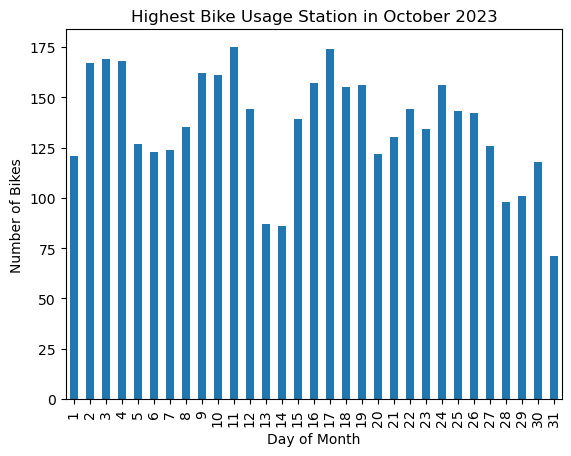

In [4]:
df_202310 = pd.read_csv('data_2023/202310-divvy-tripdata.csv')
df_202310['start_station_name'].value_counts().head()

station_name = df_202310['start_station_name'].value_counts().index[0]
print(f'station_name: {station_name}')

station_trips = df_202310[df_202310['start_station_name'] == station_name]
station_trips['day_of_month'] = pd.to_datetime(station_trips['started_at']).dt.day
trips_per_day = station_trips.groupby('day_of_month')['ride_id'].count()
trips_per_day.plot(kind='bar')

plt.title('Highest Bike Usage Station in October 2023')
plt.xlabel('Day of Month')
plt.ylabel('Number of Bikes')

### Inference

Bike usage remains relatively consistent throughout the month, with most days ranging between 100 and 175 bikes.

In [ ]:
import glob

csv_files = glob.glob('data_2023/*-divvy-tripdata.csv')

most_visited_stations = {}

for file in csv_files:
    month = file.split('-')[0]
    df = pd.read_csv(file)
    most_visited_station = df['start_station_name'].value_counts().index[0]
    most_visited_stations[month] = most_visited_station

all_data = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
most_visited_station_overall = all_data['start_station_name'].value_counts().index[0]

print("Most visited stations by month:")
for month, station in most_visited_stations.items():
    print(f"{month}: {station}")

print("\nMost visited station overall:")
print(most_visited_station_overall)

### Inference

*Streeter Dr & Grand Ave* is the most visited station so it is selected for further analysis.

## Time Series Analysis in *Streeter Dr & Grand Ave*

In [ ]:
streeter_df = all_data[all_data['start_station_name'] == 'Streeter Dr & Grand Ave']
streeter_df.sort_values('started_at', inplace=True)
streeter_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
5226586,31FFA227B5C5FF4F,electric_bike,2023-01-01 00:07:45,2023-01-01 00:13:21,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,41.892341,-87.612292,41.892278,-87.612043,casual
5300968,080D40AFF69CBC91,classic_bike,2023-01-01 00:12:40,2023-01-01 00:18:42,Streeter Dr & Grand Ave,13022,St. Clair St & Erie St,13016,41.892278,-87.612043,41.894345,-87.622798,member
5265594,D8CA60CB9D968FBA,docked_bike,2023-01-01 00:15:50,2023-01-01 00:37:18,Streeter Dr & Grand Ave,13022,Lakeview Ave & Fullerton Pkwy,TA1309000019,41.892278,-87.612043,41.925858,-87.638973,casual
5276851,85C2EA0723C0E392,electric_bike,2023-01-01 00:20:51,2023-01-01 00:46:09,Streeter Dr & Grand Ave,13022,Franklin St & Jackson Blvd,TA1305000025,41.892285,-87.612146,41.877708,-87.635321,casual
5339546,BFA29782EAB6945D,electric_bike,2023-01-01 00:23:05,2023-01-01 00:39:33,Streeter Dr & Grand Ave,13022,DuSable Lake Shore Dr & Diversey Pkwy,TA1309000039,41.892307,-87.612258,41.932588,-87.636427,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813063,DF864AF255F30879,electric_bike,2023-12-31 21:44:19,2023-12-31 22:24:51,Streeter Dr & Grand Ave,13022,NaN,NaN,41.892321,-87.612133,41.880000,-87.640000,member
4777036,0E03E94D461C242F,classic_bike,2023-12-31 22:50:35,2023-12-31 23:19:24,Streeter Dr & Grand Ave,13022,Rush St & Cedar St,KA1504000133,41.892278,-87.612043,41.902309,-87.627691,member
4761973,7A4917D3C799292A,classic_bike,2023-12-31 22:52:38,2023-12-31 23:09:35,Streeter Dr & Grand Ave,13022,Michigan Ave & Oak St,13042,41.892278,-87.612043,41.900960,-87.623777,casual
4765465,ABBBEB6B904C78B3,classic_bike,2023-12-31 22:54:50,2023-12-31 23:19:08,Streeter Dr & Grand Ave,13022,Rush St & Cedar St,KA1504000133,41.892278,-87.612043,41.902309,-87.627691,casual


## Hypothesis

We expect that the bike-sharing station located at Streeter Dr & Grand Ave, near Navy Pier, will exhibit a significantly higher volume of bike rentals on weekends compared to weekdays, due to the increased foot traffic and tourist activity in the area.

### Null Hypothesis:

There is no significant difference in the volume of bike rentals at the Streeter Dr & Grand Ave station on weekends compared to weekdays.

### Alternative Hypothesis:

The volume of bike rentals at the Streeter Dr & Grand Ave station is significantly higher on weekends compared to weekdays.




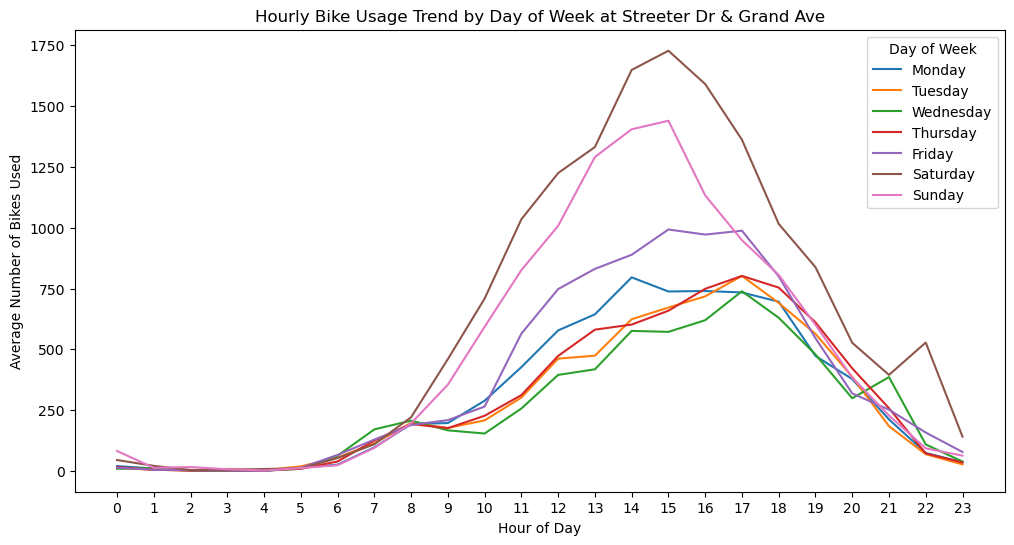

In [ ]:
streeter_df['started_at'] = pd.to_datetime(streeter_df['started_at'], format='mixed', dayfirst=True)
streeter_df['day_of_week'] = streeter_df['started_at'].dt.day_name()
streeter_df['hour_of_day'] = streeter_df['started_at'].dt.hour

hourly_usage = streeter_df.groupby(['day_of_week', 'hour_of_day']).size().reset_index(name='bike_count')

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_usage['day_of_week'] = pd.Categorical(hourly_usage['day_of_week'], categories=day_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour_of_day', y='bike_count', hue='day_of_week', data=hourly_usage)
plt.title('Hourly Bike Usage Trend by Day of Week at Streeter Dr & Grand Ave')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Bikes Used')
plt.xticks(range(24))
plt.legend(title='Day of Week')
plt.show()

### Inference

- Saturday and Sunday have significantly higher bike usage compared to weekdays, peaking around 2 PM to 3 PM.
- Weekdays exhibit more gradual increases in bike usage, with peak hours around 5 PM, likely corresponding to evening commutes.
- Usage remains minimal across all days between midnight and 6 AM, indicating limited nighttime activity.
- Weekdays show a two-peak pattern (commute times), while weekends have a single pronounced midday peak, likely reflecting recreational usage.


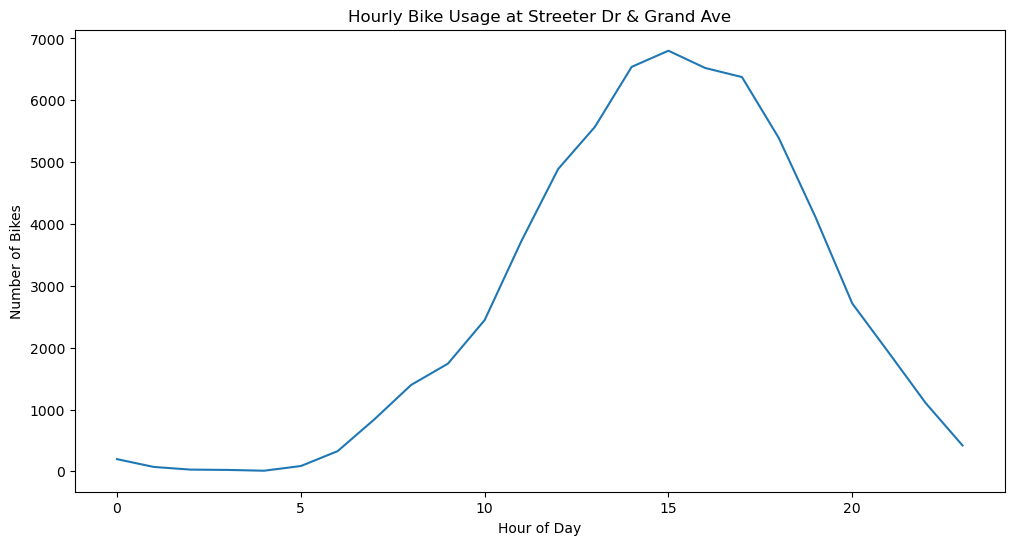

In [ ]:
bike_usage_per_week = streeter_df.groupby('hour_of_day')['ride_id'].count()

plt.figure(figsize=(12, 6))
plt.plot(bike_usage_per_week.index, bike_usage_per_week.values)
plt.title('Hourly Bike Usage at Streeter Dr & Grand Ave')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bikes')
plt.show()

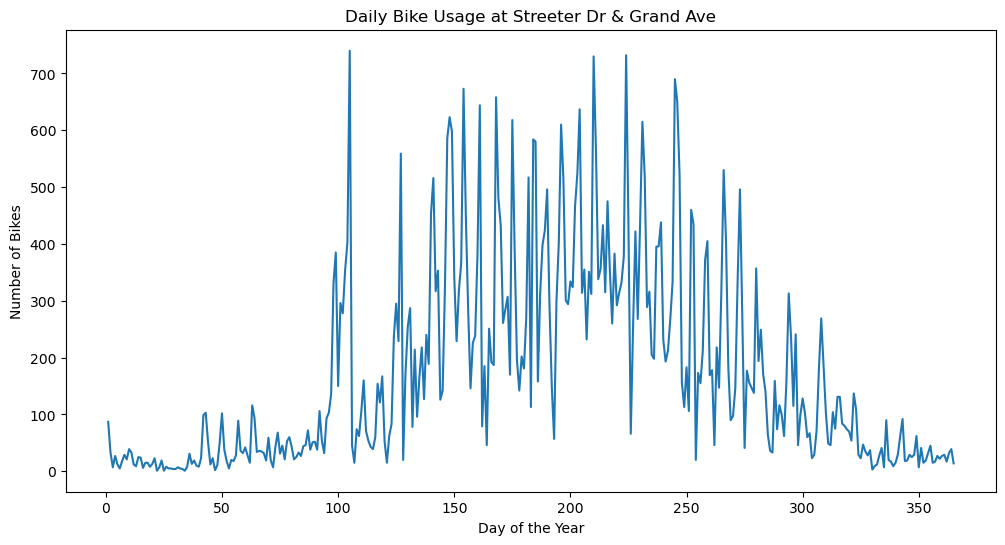

In [ ]:
streeter_df['day_of_year'] = streeter_df['started_at'].dt.dayofyear
bike_usage_per_day = streeter_df.groupby('day_of_year')['ride_id'].count()

plt.figure(figsize=(12, 6))
plt.plot(bike_usage_per_day.index, bike_usage_per_day.values)
plt.title('Daily Bike Usage at Streeter Dr & Grand Ave')
plt.xlabel('Day of the Year')
plt.ylabel('Number of Bikes')
plt.show()

### Inference

It reveals a clear pattern, with bike usage increasing as the year progresses, peaking around the middle of the year (around day 150 to 200), and gradually decreasing afterward. This pattern suggests higher bike activity during warmer months, likely spring and summer.

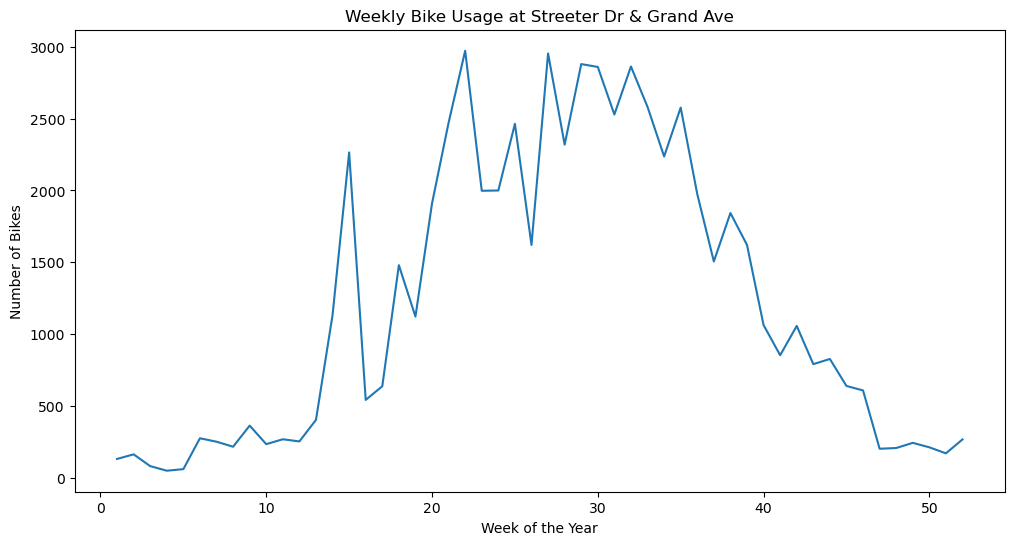

In [ ]:
streeter_df['started_at'] = pd.to_datetime(streeter_df['started_at'])
streeter_df['week_of_year'] = streeter_df['started_at'].dt.isocalendar()['week']
bike_usage_per_week = streeter_df.groupby('week_of_year')['ride_id'].count()

plt.figure(figsize=(12, 6))
plt.plot(bike_usage_per_week.index, bike_usage_per_week.values)
plt.title('Weekly Bike Usage at Streeter Dr & Grand Ave')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Bikes')
plt.show()

### Inference

It confirms that bike usage spikes significantly between weeks 15 and 35 (approximately mid-April to late August), reflecting the peak cycling season. The decline in bike usage towards the end of the year further indicates seasonal trends, with fewer rides during colder months.

In [ ]:
streeter_df.info()
print(streeter_df['started_at'].head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 63249 entries, 5226586 to 4762448
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             63249 non-null  object        
 1   rideable_type       63249 non-null  object        
 2   started_at          63249 non-null  datetime64[ns]
 3   ended_at            63249 non-null  object        
 4   start_station_name  63249 non-null  object        
 5   start_station_id    63249 non-null  object        
 6   end_station_name    59615 non-null  object        
 7   end_station_id      59615 non-null  object        
 8   start_lat           63249 non-null  float64       
 9   start_lng           63249 non-null  float64       
 10  end_lat             62985 non-null  float64       
 11  end_lng             62985 non-null  float64       
 12  member_casual       63249 non-null  object        
 13  day_of_week         63249 non-null  object 

In [ ]:
streeter_df.to_csv('streeter_2023.csv', index=False)
streeter_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,hour_of_day,day_of_year,week_of_year,year
5226586,31FFA227B5C5FF4F,electric_bike,2023-01-01 00:07:45,2023-01-01 00:13:21,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,41.892341,-87.612292,41.892278,-87.612043,casual,Sunday,0,1,1,2023
5300968,080D40AFF69CBC91,classic_bike,2023-01-01 00:12:40,2023-01-01 00:18:42,Streeter Dr & Grand Ave,13022,St. Clair St & Erie St,13016,41.892278,-87.612043,41.894345,-87.622798,member,Sunday,0,1,1,2023
5265594,D8CA60CB9D968FBA,docked_bike,2023-01-01 00:15:50,2023-01-01 00:37:18,Streeter Dr & Grand Ave,13022,Lakeview Ave & Fullerton Pkwy,TA1309000019,41.892278,-87.612043,41.925858,-87.638973,casual,Sunday,0,1,1,2023
5276851,85C2EA0723C0E392,electric_bike,2023-01-01 00:20:51,2023-01-01 00:46:09,Streeter Dr & Grand Ave,13022,Franklin St & Jackson Blvd,TA1305000025,41.892285,-87.612146,41.877708,-87.635321,casual,Sunday,0,1,1,2023
5339546,BFA29782EAB6945D,electric_bike,2023-01-01 00:23:05,2023-01-01 00:39:33,Streeter Dr & Grand Ave,13022,DuSable Lake Shore Dr & Diversey Pkwy,TA1309000039,41.892307,-87.612258,41.932588,-87.636427,casual,Sunday,0,1,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813063,DF864AF255F30879,electric_bike,2023-12-31 21:44:19,2023-12-31 22:24:51,Streeter Dr & Grand Ave,13022,NaN,NaN,41.892321,-87.612133,41.880000,-87.640000,member,Sunday,21,365,53,2023
4777036,0E03E94D461C242F,classic_bike,2023-12-31 22:50:35,2023-12-31 23:19:24,Streeter Dr & Grand Ave,13022,Rush St & Cedar St,KA1504000133,41.892278,-87.612043,41.902309,-87.627691,member,Sunday,22,365,53,2023
4761973,7A4917D3C799292A,classic_bike,2023-12-31 22:52:38,2023-12-31 23:09:35,Streeter Dr & Grand Ave,13022,Michigan Ave & Oak St,13042,41.892278,-87.612043,41.900960,-87.623777,casual,Sunday,22,365,53,2023
4765465,ABBBEB6B904C78B3,classic_bike,2023-12-31 22:54:50,2023-12-31 23:19:08,Streeter Dr & Grand Ave,13022,Rush St & Cedar St,KA1504000133,41.892278,-87.612043,41.902309,-87.627691,casual,Sunday,22,365,53,2023


## Importing Train Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

streeter_df = pd.read_csv('streeter_2023.csv')
streeter_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,hour_of_day,day_of_year,week_of_year
0,31FFA227B5C5FF4F,electric_bike,2023-01-01 00:07:45,2023-01-01 00:13:21,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,41.892341,-87.612292,41.892278,-87.612043,casual,Sunday,0,1,52
1,080D40AFF69CBC91,classic_bike,2023-01-01 00:12:40,2023-01-01 00:18:42,Streeter Dr & Grand Ave,13022,St. Clair St & Erie St,13016,41.892278,-87.612043,41.894345,-87.622798,member,Sunday,0,1,52
2,D8CA60CB9D968FBA,docked_bike,2023-01-01 00:15:50,2023-01-01 00:37:18,Streeter Dr & Grand Ave,13022,Lakeview Ave & Fullerton Pkwy,TA1309000019,41.892278,-87.612043,41.925858,-87.638973,casual,Sunday,0,1,52
3,85C2EA0723C0E392,electric_bike,2023-01-01 00:20:51,2023-01-01 00:46:09,Streeter Dr & Grand Ave,13022,Franklin St & Jackson Blvd,TA1305000025,41.892285,-87.612146,41.877708,-87.635321,casual,Sunday,0,1,52
4,BFA29782EAB6945D,electric_bike,2023-01-01 00:23:05,2023-01-01 00:39:33,Streeter Dr & Grand Ave,13022,DuSable Lake Shore Dr & Diversey Pkwy,TA1309000039,41.892307,-87.612258,41.932588,-87.636427,casual,Sunday,0,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63244,DF864AF255F30879,electric_bike,2023-12-31 21:44:19,2023-12-31 22:24:51,Streeter Dr & Grand Ave,13022,NaN,NaN,41.892321,-87.612133,41.880000,-87.640000,member,Sunday,21,365,52
63245,0E03E94D461C242F,classic_bike,2023-12-31 22:50:35,2023-12-31 23:19:24,Streeter Dr & Grand Ave,13022,Rush St & Cedar St,KA1504000133,41.892278,-87.612043,41.902309,-87.627691,member,Sunday,22,365,52
63246,7A4917D3C799292A,classic_bike,2023-12-31 22:52:38,2023-12-31 23:09:35,Streeter Dr & Grand Ave,13022,Michigan Ave & Oak St,13042,41.892278,-87.612043,41.900960,-87.623777,casual,Sunday,22,365,52
63247,ABBBEB6B904C78B3,classic_bike,2023-12-31 22:54:50,2023-12-31 23:19:08,Streeter Dr & Grand Ave,13022,Rush St & Cedar St,KA1504000133,41.892278,-87.612043,41.902309,-87.627691,casual,Sunday,22,365,52


## Feature Engineering

In [4]:
import pandas as pd
import numpy as np

def data_transform(df: pd.DataFrame, groupby: str) -> pd.DataFrame:
    df['started_at'] = pd.to_datetime(df['started_at'], format='mixed', dayfirst=True)
    df.sort_values('started_at', inplace=True)

    if groupby == 'D':
        features = df.groupby(df['started_at'].dt.date).size().reset_index(name='ride_count')
    elif groupby == 'H':
        features = df.groupby(pd.Grouper(key='started_at', freq='H')).size().reset_index(name='ride_count')
    features['started_at'] = pd.to_datetime(features['started_at'])
    features.set_index('started_at', inplace=True)

    features['day_of_year'] = features.index.dayofyear
    features['week_of_year'] = features.index.isocalendar().week
    features['day_of_week'] = features.index.dayofweek
    features['is_weekend'] = (features['day_of_week'] >= 5).astype(int)

    features['day_sin'] = np.sin(features['day_of_week'] * (2 * np.pi / 7))
    features['day_cos'] = np.cos(features['day_of_week'] * (2 * np.pi / 7))

    return features

train_features_days = data_transform(streeter_df, groupby='D')
train_features_days

,ride_count,day_of_year,week_of_year,day_of_week,is_weekend,day_sin,day_cos
started_at,,,,,,,
2023-01-01,87,1,52,6,1,-0.781831,0.623490
2023-01-02,33,2,1,0,0,0.000000,1.000000
2023-01-03,7,3,1,1,0,0.781831,0.623490
2023-01-04,27,4,1,2,0,0.974928,-0.222521
2023-01-05,12,5,1,3,0,0.433884,-0.900969
...,...,...,...,...,...,...,...
2023-12-27,29,361,52,2,0,0.974928,-0.222521
2023-12-28,17,362,52,3,0,0.433884,-0.900969
2023-12-29,32,363,52,4,0,-0.433884,-0.900969


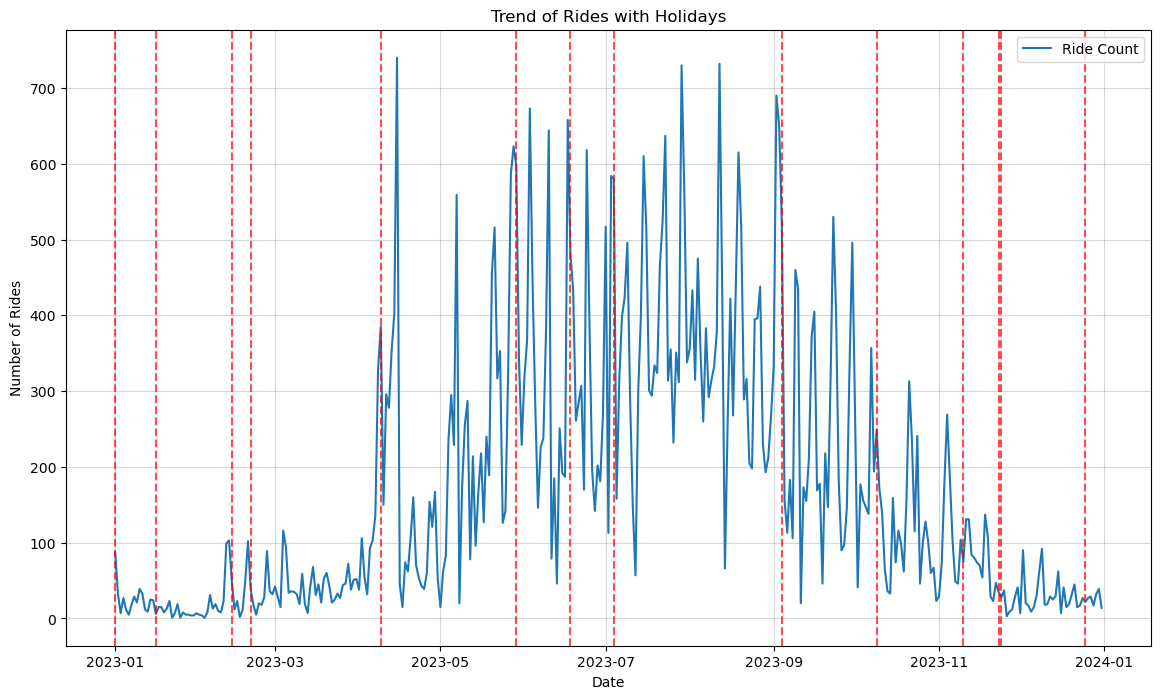

In [5]:
holidays_df = pd.read_csv('data_2023/holidays.csv')
holidays_df['date'] = pd.to_datetime(holidays_df['date'])

plt.figure(figsize=(14, 8))
plt.plot(train_features_days.index, train_features_days['ride_count'], label='Ride Count')

# Add holidays as vertical lines
for holiday in holidays_df['date']:
    plt.axvline(x=holiday, color='r', linestyle='--', alpha=0.7)

# Add labels and title
plt.title('Trend of Rides with Holidays')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

Inference: As you can see for most holiday's the time around that date led to a spike in Divvy bike usage. Even if the spike is small compared to peak days throughout the year, the spikes that happen tend to be signifcant for that time period. Meaning the days before/after have significantly lower usage than the holiday date.

In [6]:
train_features_hours = data_transform(streeter_df, groupby='H')
train_features_hours.reset_index(inplace=True)
train_features_hours

/var/folders/gc/8gz99sqd4790gsdvvnxnmjm00000gn/T/ipykernel_38451/766180666.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  features = df.groupby(pd.Grouper(key='started_at', freq='H')).size().reset_index(name='ride_count')


,started_at,ride_count,day_of_year,week_of_year,day_of_week,is_weekend,day_sin,day_cos
0,2023-01-01 00:00:00,23,1,52,6,1,-0.781831,0.62349
1,2023-01-01 01:00:00,4,1,52,6,1,-0.781831,0.62349
2,2023-01-01 02:00:00,4,1,52,6,1,-0.781831,0.62349
3,2023-01-01 03:00:00,0,1,52,6,1,-0.781831,0.62349
4,2023-01-01 04:00:00,0,1,52,6,1,-0.781831,0.62349
...,...,...,...,...,...,...,...,...
8755,2023-12-31 19:00:00,0,365,52,6,1,-0.781831,0.62349
8756,2023-12-31 20:00:00,1,365,52,6,1,-0.781831,0.62349
8757,2023-12-31 21:00:00,1,365,52,6,1,-0.781831,0.62349
8758,2023-12-31 22:00:00,3,365,52,6,1,-0.781831,0.62349


In [7]:
weather_df = pd.read_csv('weatherData.csv', index_col=0)
weather_df['date'] = pd.to_datetime(weather_df['date'], format='mixed', dayfirst=True)
weather_df

,date,temperature_2m,precipitation,rain,snowfall,wind_speed_10m,wind_speed_100m,wind_direction_100m
0,2023-01-01 06:00:00+00:00,1.806500,0.0,0.0,0.0,13.905509,24.933735,175.03035
1,2023-01-01 07:00:00+00:00,2.256500,0.0,0.0,0.0,14.759999,26.987997,189.21095
2,2023-01-01 08:00:00+00:00,2.456500,0.0,0.0,0.0,12.924952,24.482647,199.76726
3,2023-01-01 09:00:00+00:00,2.456500,1.8,1.8,0.0,13.910169,25.006400,202.87370
4,2023-01-01 10:00:00+00:00,2.556500,1.5,1.5,0.0,14.241629,25.922500,207.27667
...,...,...,...,...,...,...,...,...
16478,2024-11-17 20:00:00+00:00,14.756500,0.0,0.0,0.0,11.032987,17.146358,243.16603
16479,2024-11-17 21:00:00+00:00,14.806500,0.0,0.0,0.0,10.086427,17.750774,239.53453
16480,2024-11-17 22:00:00+00:00,14.156500,0.0,0.0,0.0,8.027678,16.641972,231.14662
16481,2024-11-17 23:00:00+00:00,13.506500,0.0,0.0,0.0,5.904439,15.189484,229.32515


In [8]:
weather_df['date'] = weather_df['date'].dt.tz_localize(None)
train_features_hours['started_at'] = train_features_hours['started_at'].dt.tz_localize(None)

combined_df = pd.merge(train_features_hours, weather_df, left_on='started_at', right_on='date')
combined_df

,started_at,ride_count,day_of_year,week_of_year,day_of_week,is_weekend,day_sin,day_cos,date,temperature_2m,precipitation,rain,snowfall,wind_speed_10m,wind_speed_100m,wind_direction_100m
0,2023-01-01 06:00:00,0,1,52,6,1,-0.781831,0.62349,2023-01-01 06:00:00,1.8065,0.0,0.0,0.00,13.905509,24.933735,175.03035
1,2023-01-01 07:00:00,0,1,52,6,1,-0.781831,0.62349,2023-01-01 07:00:00,2.2565,0.0,0.0,0.00,14.759999,26.987997,189.21095
2,2023-01-01 08:00:00,0,1,52,6,1,-0.781831,0.62349,2023-01-01 08:00:00,2.4565,0.0,0.0,0.00,12.924952,24.482647,199.76726
3,2023-01-01 09:00:00,0,1,52,6,1,-0.781831,0.62349,2023-01-01 09:00:00,2.4565,1.8,1.8,0.00,13.910169,25.006400,202.87370
4,2023-01-01 10:00:00,0,1,52,6,1,-0.781831,0.62349,2023-01-01 10:00:00,2.5565,1.5,1.5,0.00,14.241629,25.922500,207.27667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8749,2023-12-31 19:00:00,0,365,52,6,1,-0.781831,0.62349,2023-12-31 19:00:00,0.6065,0.1,0.0,0.07,20.172853,25.068514,305.05950
8750,2023-12-31 20:00:00,1,365,52,6,1,-0.781831,0.62349,2023-12-31 20:00:00,0.7565,0.1,0.0,0.07,19.171478,24.567198,304.85452
8751,2023-12-31 21:00:00,1,365,52,6,1,-0.781831,0.62349,2023-12-31 21:00:00,0.9065,0.1,0.0,0.07,19.642280,25.603062,297.64587
8752,2023-12-31 22:00:00,3,365,52,6,1,-0.781831,0.62349,2023-12-31 22:00:00,0.8065,0.1,0.0,0.07,18.892282,25.376808,301.66070


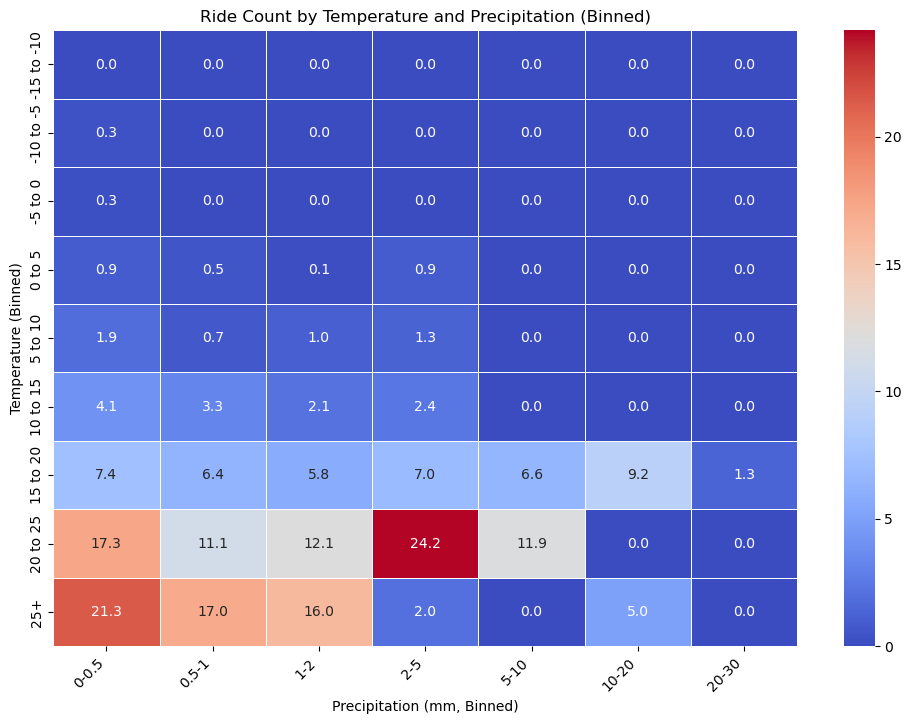

In [ ]:
weath_df = combined_df.copy(deep=True)

#bin the temperature
weath_df['temperature_bin'] = pd.cut(
    weath_df['temperature_2m'],
    bins=[-20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30],
    labels=['<-15', '-15 to -10', '-10 to -5', '-5 to 0', '0 to 5', '5 to 10', '10 to 15', '15 to 20', '20 to 25', '25+']
)

#bin precipitation
weath_df['precipitation_bin'] = pd.cut(
    weath_df['precipitation'],
    bins=[0, 0.5, 1, 2, 5, 10, 20, 30],
    labels=['0-0.5', '0.5-1', '1-2', '2-5', '5-10', '10-20', '20-30']
)

#group by temperature and precipitation
grouped_weather = weath_df.groupby(['temperature_bin', 'precipitation_bin'], observed=False)['ride_count'].mean().reset_index()

#pivot table
pivot_data = grouped_weather.pivot_table(
    values='ride_count',
    index='temperature_bin',
    columns='precipitation_bin',
    aggfunc='mean',
    observed=False
)

#filter NaN values
pivot_data = pivot_data.fillna(0)

#plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)

#plot labels
plt.title("Ride Count by Temperature and Precipitation (Binned)")
plt.ylabel("Temperature (Binned)")
plt.xlabel("Precipitation (mm, Binned)")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

Inference: People much prefer riding in warmer weather, about >= 20 degrees celsius. Heavy rain corresponses with fewer rides, regardless of temperature. The highest ride count occures in warm weather, but surprisingly with some rain (2-5mm). Meaning little rain is not necessarily a deterent from riding Divvy bicycles which was a surprise to us.

## Baseline Model - Moving Average

Text(0, 0.5, 'Ride Count')

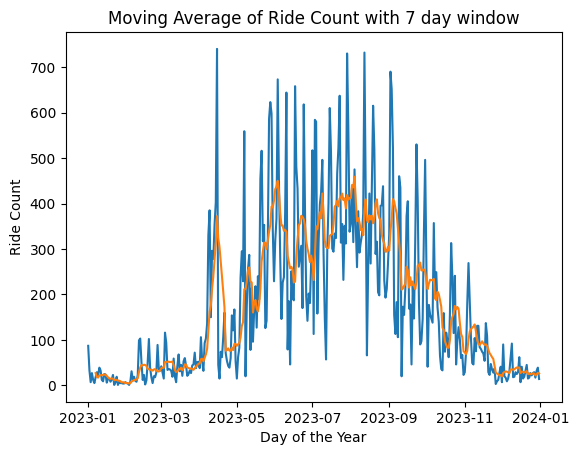

In [51]:
train_features_days['ride_count_ma_7'] = train_features_days['ride_count'].rolling(window=7).mean()

sns.lineplot(x=train_features_days.index, y=train_features_days['ride_count'])
sns.lineplot(x=train_features_days.index, y=train_features_days['ride_count_ma_7'])

plt.title('Moving Average of Ride Count with 7 day window')
plt.xlabel('Day of the Year')
plt.ylabel('Ride Count')

As you can see this model does not do a great job predicting average ride count. The 7 day window SMA model is not enough. While it gets the general movements correct, the quantities predicted tend to be lower than the actual amount. Moving forward we will try to alter the window size to see what effects it has on the predictions.

Text(0, 0.5, 'Ride Count')

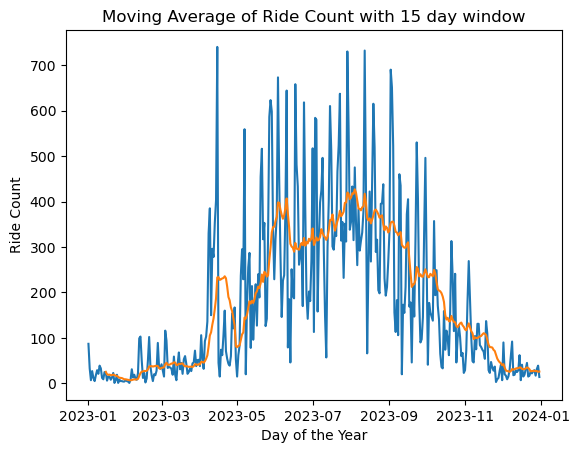

In [105]:
train_features_days['ride_count_ma_15'] = train_features_days['ride_count'].rolling(window=15).mean()

sns.lineplot(x=train_features_days.index, y=train_features_days['ride_count'])
sns.lineplot(x=train_features_days.index, y=train_features_days['ride_count_ma_15'])

plt.title('Moving Average of Ride Count with 15 day window')
plt.xlabel('Day of the Year')
plt.ylabel('Ride Count')

With this model we tried to extend the window to 15 days in which the simple moving average model was calculated. However, this really did not improve the model as it is still predicting too low of ride counts. 

Text(0, 0.5, 'Ride Count')

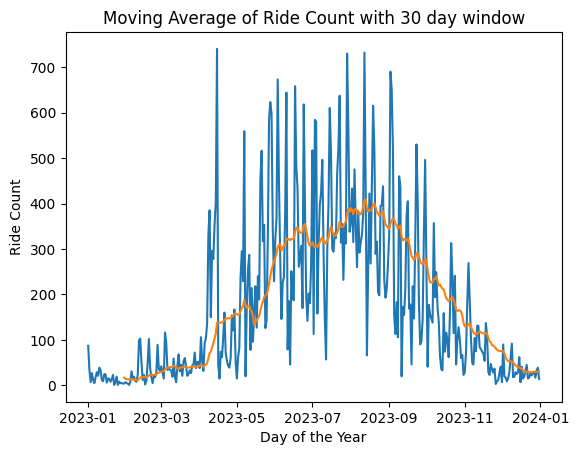

In [52]:
train_features_days['ride_count_ma_30'] = train_features_days['ride_count'].rolling(window=30).mean()

sns.lineplot(x=train_features_days.index, y=train_features_days['ride_count'])
sns.lineplot(x=train_features_days.index, y=train_features_days['ride_count_ma_30'])

plt.title('Moving Average of Ride Count with 30 day window')
plt.xlabel('Day of the Year')
plt.ylabel('Ride Count')


Again we tried extending the window, but once again it did not make a serious impact in performance. Still it is under predicting and moving forward we will try other models to hopefullly get better predictions. 

### Inference

The plot displays the moving average (in orange) to smooth out fluctuations. The raw data (in blue) shows considerable variability, with peaks during warmer months. The moving average trend line highlights a steady increase in bike usage starting from early spring (around March), reaching a peak during the summer months (June to August), and then gradually declining towards the end of the year. This moving average clearly illustrates the seasonal pattern, confirming that bike rides are more frequent during warmer periods and decrease as the year progresses into colder months.

### Test Data - 2024

In [ ]:
import glob
if not test_run:
    csv_files = glob.glob('data_2024/*-divvy-tripdata.csv')
    df_2024 = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
    df_2024.sort_values('started_at', inplace=True)
    streeter_df_2024 = df_2024[df_2024['start_station_name'] == 'Streeter Dr & Grand Ave']
    streeter_df_2024.to_csv('streeter_2024.csv', index=False)
    df_2024

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,743252713F32516B,classic_bike,2024-04-22 19:08:21,2024-04-22 19:12:56,Aberdeen St & Jackson Blvd,13157,Desplaines St & Jackson Blvd,15539,41.877726,-87.654787,41.878119,-87.643948,member
1,BE90D33D2240C614,electric_bike,2024-04-11 06:19:24,2024-04-11 06:22:21,Aberdeen St & Jackson Blvd,13157,Desplaines St & Jackson Blvd,15539,41.877722,-87.654959,41.878119,-87.643948,member
2,D47BBDDE7C40DD61,classic_bike,2024-04-20 11:13:13,2024-04-20 11:29:31,Sheridan Rd & Montrose Ave,TA1307000107,Ashland Ave & Belle Plaine Ave,13249,41.961670,-87.654640,41.956057,-87.668835,member
3,6684E760BF9EA9B5,classic_bike,2024-04-04 18:39:20,2024-04-04 18:43:06,Aberdeen St & Jackson Blvd,13157,Desplaines St & Jackson Blvd,15539,41.877726,-87.654787,41.878119,-87.643948,member
4,CA9EFC0D24C24A27,electric_bike,2024-04-19 19:30:20,2024-04-19 20:07:42,Sheridan Rd & Montrose Ave,TA1307000107,Stetson Ave & South Water St,TA1308000029,41.961613,-87.654615,41.886835,-87.622320,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5347116,71F72E76C0BD298A,electric_bike,2024-08-09 14:34:08.222,2024-08-09 14:51:31.936,Canal St & Jackson Blvd,13138,NaN,NaN,41.878125,-87.639968,41.910000,-87.650000,member
5347117,CC9B1538EE80EEF5,electric_bike,2024-08-09 20:23:23.237,2024-08-09 20:37:30.107,Clybourn Ave & Division St,TA1307000115,NaN,NaN,41.904533,-87.640626,41.940000,-87.650000,member
5347118,0F2CB3D2FDC5C124,electric_bike,2024-08-18 00:36:26.939,2024-08-18 00:38:45.112,Fairbanks Ct & Grand Ave,TA1305000003,NaN,NaN,41.891847,-87.620580,41.890000,-87.620000,member
5347119,FAAD5D34100D74DF,electric_bike,2024-08-30 11:22:50.179,2024-08-30 11:47:10.750,Paulina St & Montrose Ave,TA1309000021,NaN,NaN,41.961507,-87.671387,42.020000,-87.690000,member


## Importing Test Data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

streeter_df_test = pd.read_csv('streeter_2024.csv')
streeter_df_test

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,700598A572BB802A,classic_bike,2024-01-01 00:28:47,2024-01-01 00:52:25,Streeter Dr & Grand Ave,13022,Michigan Ave & Jackson Blvd,TA1309000002,41.892278,-87.612043,41.878005,-87.624144,casual
1,C1AE5CC01D9B38B9,electric_bike,2024-01-01 00:28:56,2024-01-01 00:52:28,Streeter Dr & Grand Ave,13022,Michigan Ave & Jackson Blvd,TA1309000002,41.892308,-87.612122,41.878005,-87.624144,casual
2,851095FD0B27FA67,classic_bike,2024-01-01 03:54:27,2024-01-02 04:54:20,Streeter Dr & Grand Ave,13022,NaN,NaN,41.892278,-87.612043,NaN,NaN,casual
3,11648B227DE12A0B,classic_bike,2024-01-01 07:47:36,2024-01-01 08:25:09,Streeter Dr & Grand Ave,13022,Wabash Ave & Roosevelt Rd,TA1305000002,41.892278,-87.612043,41.867227,-87.625961,member
4,D43BB063C7D5D37A,electric_bike,2024-01-01 11:50:03,2024-01-01 11:55:45,Streeter Dr & Grand Ave,13022,Dearborn St & Erie St,13045,41.892299,-87.612130,41.893992,-87.629318,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62999,88259F9501609A70,classic_bike,2024-10-31 16:55:16.973,2024-10-31 17:21:53.243,Streeter Dr & Grand Ave,13022,Sedgwick St & Schiller St,TA1307000143,41.892278,-87.612043,41.907626,-87.638566,member
63000,013E4D45AE92D654,classic_bike,2024-10-31 16:55:50.956,2024-10-31 17:28:28.462,Streeter Dr & Grand Ave,13022,Indiana Ave & Roosevelt Rd,SL-005,41.892278,-87.612043,41.867888,-87.623041,casual
63001,8FE21221F445435F,classic_bike,2024-10-31 17:21:54.645,2024-10-31 17:40:56.548,Streeter Dr & Grand Ave,13022,Dearborn St & Erie St,13045,41.892278,-87.612043,41.893992,-87.629318,casual
63002,93B6844329ED38AC,electric_bike,2024-10-31 18:29:10.745,2024-10-31 18:57:34.956,Streeter Dr & Grand Ave,13022,NaN,NaN,41.892278,-87.612043,41.960000,-87.650000,member


In [10]:
test_features = data_transform(streeter_df_test, 'D')
test_features

,ride_count,day_of_year,week_of_year,day_of_week,is_weekend,day_sin,day_cos
started_at,,,,,,,
2024-01-01,16,1,1,0,0,0.000000,1.000000
2024-01-02,33,2,1,1,0,0.781831,0.623490
2024-01-03,20,3,1,2,0,0.974928,-0.222521
2024-01-04,19,4,1,3,0,0.433884,-0.900969
2024-01-05,30,5,1,4,0,-0.433884,-0.900969
...,...,...,...,...,...,...,...
2024-10-27,218,301,43,6,1,-0.781831,0.623490
2024-10-28,91,302,44,0,0,0.000000,1.000000
2024-10-29,128,303,44,1,0,0.781831,0.623490


In [12]:
train_features_days

,ride_count,day_of_year,week_of_year,day_of_week,is_weekend,day_sin,day_cos
started_at,,,,,,,
2023-01-01,87,1,52,6,1,-0.781831,0.623490
2023-01-02,33,2,1,0,0,0.000000,1.000000
2023-01-03,7,3,1,1,0,0.781831,0.623490
2023-01-04,27,4,1,2,0,0.974928,-0.222521
2023-01-05,12,5,1,3,0,0.433884,-0.900969
...,...,...,...,...,...,...,...
2023-12-27,29,361,52,2,0,0.974928,-0.222521
2023-12-28,17,362,52,3,0,0.433884,-0.900969
2023-12-29,32,363,52,4,0,-0.433884,-0.900969


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge train_features and test_features into a single DataFrame
merged_df = pd.concat([train_features_days, test_features])

# Calculate the moving average for the ride_count column
merged_df['ride_count_ma'] = merged_df['ride_count'].rolling(window=7).mean()

# Plot a graph showing the frequency of ride count and the moving average prediction for test data
plt.figure(figsize=(10, 6))
plt.plot(merged_df['ride_count'], label='Ride Count')
plt.plot(merged_df['ride_count_ma'], label='Moving Average Prediction')
plt.title('Frequency of Ride Count and Moving Average Prediction')
plt.xlabel('Index')
plt.ylabel('Ride Count')
plt.legend()
plt.show()

## Weighted Moving Average

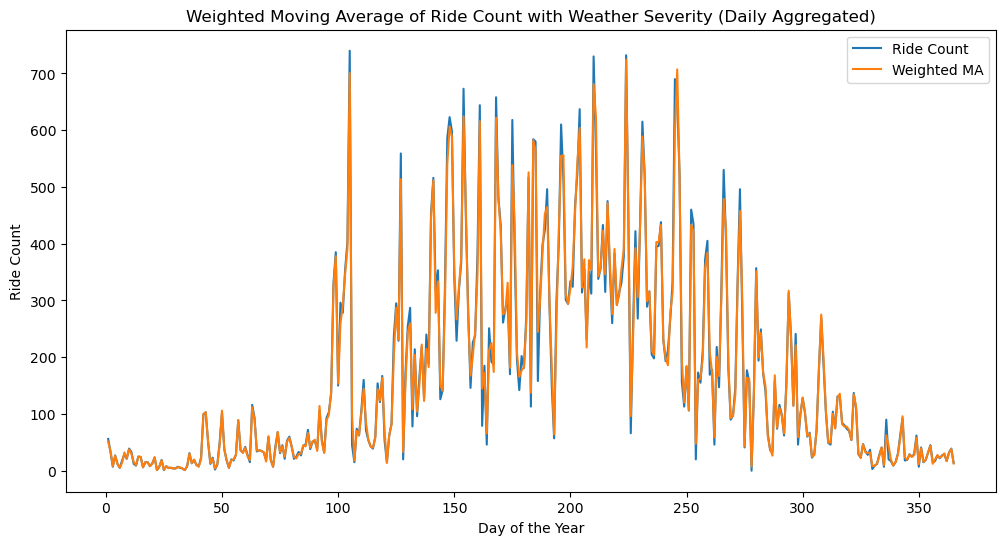

In [ ]:
combined_df_copy = combined_df.copy()
combined_df_copy['weather_severity'] = (
    combined_df['precipitation'] * 0.5 +  # 50% weight to precipitation
    abs(combined_df['temperature_2m'] - 20) * 0.3 +  # distance from average (20°C), 30% weight
    combined_df['wind_speed_10m'] * 0.2  # 20% weight to wind speed
)

def weighted_moving_average(values, weights):
    return np.sum(values * weights) / np.sum(weights)

combined_df_copy['ride_count_wma'] = combined_df_copy['ride_count'].rolling(window=7).apply(
    lambda x: weighted_moving_average(x, combined_df_copy.loc[x.index, 'weather_severity']),
    raw=False
)

daily_data = combined_df_copy.groupby('day_of_year').agg({
    'ride_count': 'sum',
    'ride_count_wma': 'sum'
}).reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=daily_data['day_of_year'], y=daily_data['ride_count'], label='Ride Count')
sns.lineplot(x=daily_data['day_of_year'], y=daily_data['ride_count_wma'], label='Weighted MA')
plt.title('Weighted Moving Average of Ride Count with Weather Severity (Daily Aggregated)')
plt.xlabel('Day of the Year')
plt.ylabel('Ride Count')
plt.legend()
plt.show()

Instead of the previously used simple moving average, we have now implemented a weighted moving average that considers the weather severity.
The weather severity is calculated based on the precipitation, temperature, and wind speed.
The weighted moving average is then calculated using the weather severity as weights.
The resulting plot shows the weighted moving average of the ride count with the weather severity considered.
As you can see this model performs much better than the moving average, and we can assume weather plays a pivital role in predicting Divvy bike usage.

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate the Mean Squared Error
mse = mean_squared_error(combined_df_copy['ride_count'][int(len(combined_df_copy) * 0.8):], combined_df_copy['ride_count_wma'][int(len(combined_df_copy) * 0.8):])
print(f"Mean Squared Error: {mse:.2f}")

# Calculate the Mean Absolute Error
mae = mean_absolute_error(combined_df_copy['ride_count'][int(len(combined_df_copy) * 0.8):], combined_df_copy['ride_count_wma'][int(len(combined_df_copy) * 0.8):])
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 18.90
Mean Absolute Error: 2.29


As you can see our errors are relatively low becuase the ride count can go as high as 700. 18.90 is relatively small compared to the variance in Divvy usage for ridership. Also, the absolute error is quite small. Therefore, the weighted moving average model is quite the improvement for predicting ride count.

##  SARIMA Autoregressive Integrated Moving Average

In [94]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the data
def load_and_prepare_data():
    # Load streeter_2023.csv
    streeter_df = pd.read_csv('streeter_2023.csv')
    streeter_df['started_at'] = pd.to_datetime(streeter_df['started_at'])
    streeter_df['date'] = streeter_df['started_at'].dt.date

    # Aggregate daily ride counts
    daily_rides = streeter_df.groupby('date').size().reset_index(name='ride_count')

    # Convert date to datetime and set as index
    daily_rides['date'] = pd.to_datetime(daily_rides['date'])
    daily_rides.set_index('date', inplace=True)

    return daily_rides

# Step 2: Clean data
def clean_data(daily_rides):
    # Check and remove NaN or inf in ride_count
    daily_rides = daily_rides[~daily_rides['ride_count'].isna()]
    daily_rides = daily_rides[~np.isinf(daily_rides['ride_count'])]

    # Apply differencing if needed and drop NaN rows
    daily_rides['ride_count_diff'] = daily_rides['ride_count'].diff()
    daily_rides = daily_rides.dropna(subset=['ride_count_diff'])
    daily_rides = daily_rides[~np.isinf(daily_rides['ride_count_diff'])]

    return daily_rides

# Train SARIMA model
def train_sarima(data, seasonal_order, order=(1, 1, 1)):
    model = SARIMAX(data, order=order, seasonal_order=seasonal_order)
    fit = model.fit(disp=False)
    return fit

# Forecast future data
def forecast_sarima(fit, steps):
    forecast = fit.get_forecast(steps=steps)
    forecast_index = pd.date_range(start=fit.model.data.dates[-1], periods=steps + 1, freq='W')[1:]
    forecast_values = forecast.predicted_mean
    conf_int = forecast.conf_int()

    forecast_df = pd.DataFrame({
        'date': forecast_index,
        'forecast': forecast_values,
        'lower_ci': conf_int.iloc[:, 0],
        'upper_ci': conf_int.iloc[:, 1]
    }).set_index('date')

    return forecast_df

# Plot results
def plot_results(train_data, forecast_df):
    plt.figure(figsize=(14, 8))
    plt.plot(train_data, label='Original Data (2023)', color='blue')
    plt.plot(forecast_df['forecast'], label='Forecast (2024)', color='green', linestyle='--')
    plt.fill_between(
        forecast_df.index,
        forecast_df['lower_ci'],
        forecast_df['upper_ci'],
        color='green',
        alpha=0.2,
        label='95% Confidence Interval'
    )

    plt.title('SARIMA Ride Count Forecast for 2024', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Ride Count', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.5)
    plt.show()


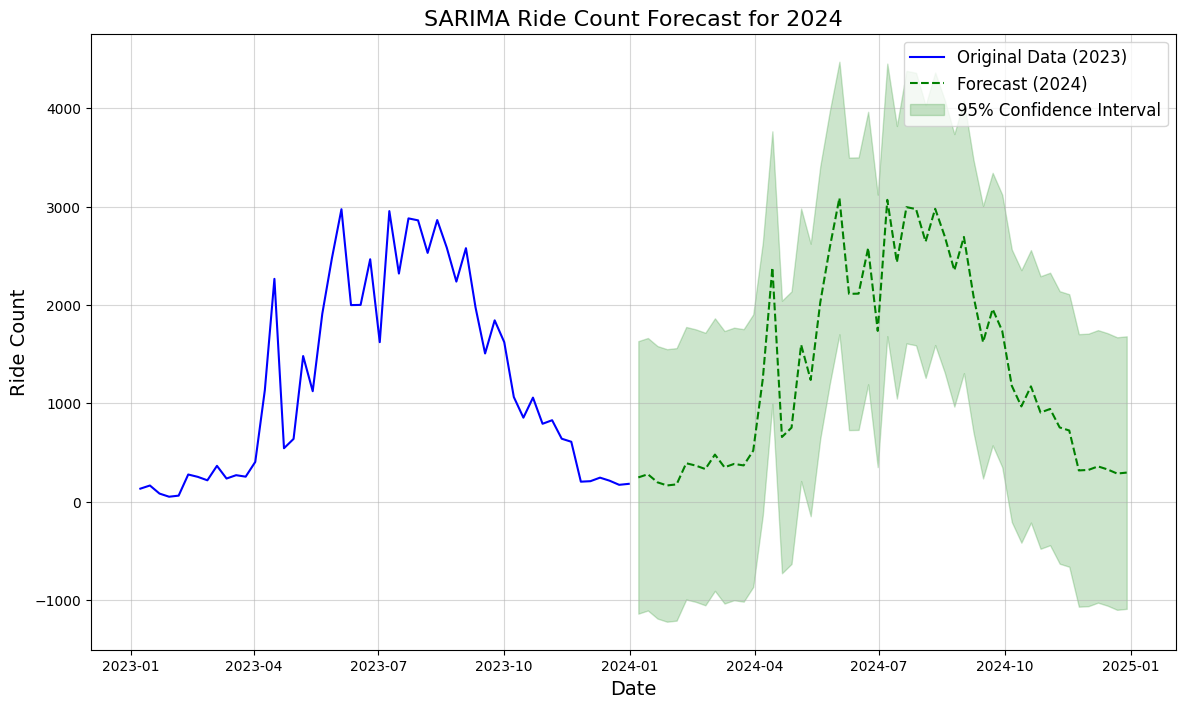

In [96]:
# Load and clean data
daily_rides = load_and_prepare_data()
daily_rides = clean_data(daily_rides)

# Aggregate data weekly to reduce noise
daily_rides_weekly = daily_rides.resample('W').sum()


seasonal_order = (1, 1, 1, 52)  # Seasonal ARIMA order (P, D, Q, S)

# Train SARIMA model
sarima_fit = train_sarima(daily_rides_weekly['ride_count'], seasonal_order=seasonal_order)

# Forecast for 1 year (52 weeks)
forecast_steps = 52
forecast_df = forecast_sarima(sarima_fit, steps=forecast_steps)

# Plot results
plot_results(daily_rides_weekly['ride_count'], forecast_df)


## Recurrent Neural Networks

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step


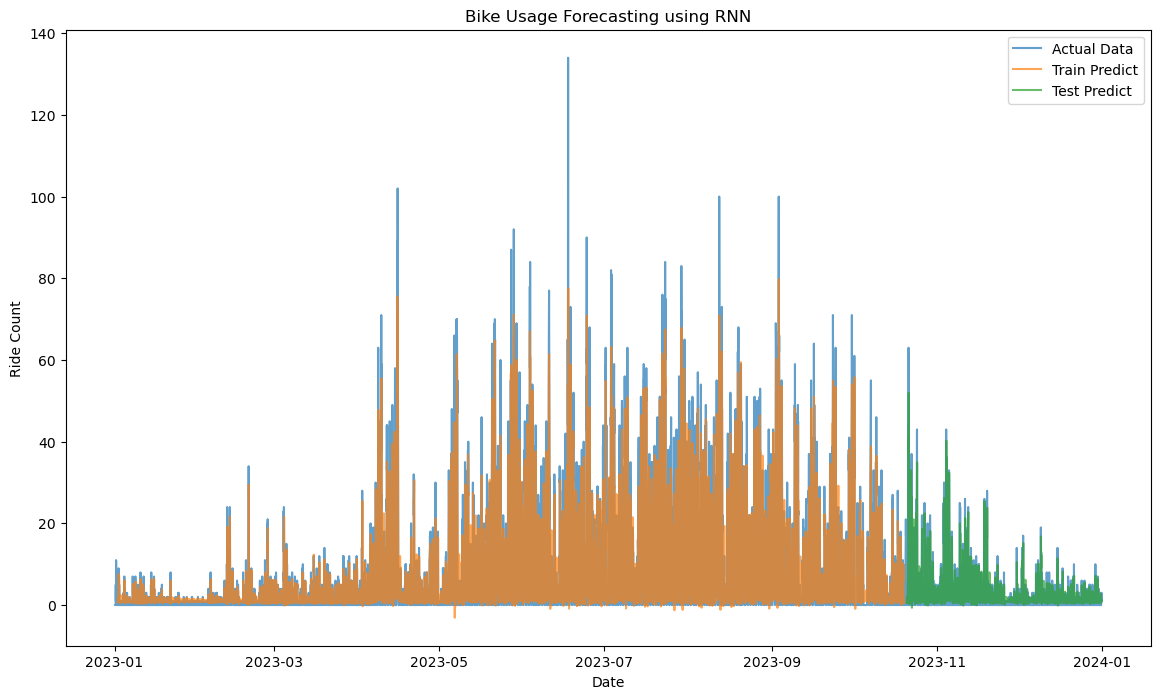

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input
import matplotlib.pyplot as plt

#load data
rnn_data = combined_df[['started_at', 'ride_count']].copy()
rnn_data['started_at'] = pd.to_datetime(rnn_data['started_at'])
rnn_data.set_index('started_at', inplace=True)


#normalize data
rnn_scaler = MinMaxScaler(feature_range=(0, 1))
rnn_scaled = rnn_scaler.fit_transform(rnn_data)

#create the training and test datasets
rnn_size = int(len(rnn_scaled) * 0.8)
rnn_train = rnn_scaled[:rnn_size]
rnn_test = rnn_scaled[rnn_size:]


#create dataset with look back
def rnn_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 21  # of past days to consider for prediction
X_train_rnn, y_train_rnn = rnn_dataset(rnn_train, look_back)
X_test_rnn, y_test_rnn = rnn_dataset(rnn_test, look_back)

#reshape input to be [samples, time steps, features]
X_train_rnn = np.reshape(X_train_rnn, (X_train_rnn.shape[0], X_train_rnn.shape[1], 1))
X_test_rnn = np.reshape(X_test_rnn, (X_test_rnn.shape[0], X_test_rnn.shape[1], 1))

#building the RNN model
rnn_model = Sequential()
rnn_model.add(Input(shape=(look_back, 1)))  #input layer
rnn_model.add(SimpleRNN(50, return_sequences=True, activation='tanh')) #first simple rnn layer
rnn_model.add(SimpleRNN(50, return_sequences=False, activation='tanh')) #second simplernn layer
rnn_model.add(Dense(25, activation='relu')) #dense later
rnn_model.add(Dense(1))  #output layer

#compile model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

#train the model
rnn_model.fit(X_train_rnn, y_train_rnn, batch_size=8, verbose=0, epochs=10)

#making the predictions
train_predict_rnn = rnn_model.predict(X_train_rnn)
test_predict_rnn = rnn_model.predict(X_test_rnn)

# Invert predictions and original data to their original scale
train_predict_rnn = rnn_scaler.inverse_transform(train_predict_rnn)
test_predict_rnn = rnn_scaler.inverse_transform(test_predict_rnn)
y_train_rnn = rnn_scaler.inverse_transform([y_train_rnn])
y_test_rnn = rnn_scaler.inverse_transform([y_test_rnn])

#prepare the predictions for plotting
rnn_train_plot = np.empty_like(rnn_scaled)
rnn_train_plot[:, :] = np.nan
rnn_train_plot[look_back:len(train_predict_rnn) + look_back, :] = train_predict_rnn

rnn_test_plot = np.empty_like(rnn_scaled)
rnn_test_plot[:, :] = np.nan
rnn_test_plot[len(train_predict_rnn) + (look_back * 2) + 1:len(rnn_scaled) - 1, :] = test_predict_rnn

#plot predictions
plt.figure(figsize=(14, 8))
plt.plot(rnn_data.index, rnn_scaler.inverse_transform(rnn_scaled), label='Actual Data', alpha=0.7)
plt.plot(rnn_data.index, rnn_train_plot, label='Train Predict', alpha=0.7)
plt.plot(rnn_data.index, rnn_test_plot, label='Test Predict', alpha=0.7)
plt.title('Bike Usage Forecasting using RNN')
plt.xlabel('Date')
plt.ylabel('Ride Count')
plt.legend()
plt.show()

The orange line closely follows the blue line for the training period (earlier portion of the graph), indicating that the model learned the training data well.
The green line also tracks the actual data reasonably well but may show slight deviations. This is expected in a test set and is a good indicator of the model's generalization and not overfitting to the training data.
Peaks in ride counts (up to 140 rides) occur periodically, possibly correlating with weather, events, or other factors. The model captures these trends effectively during both training and testing.
Overall, this model shows a lot of promise as it captures trends/patterns in both the training and testing datasets.

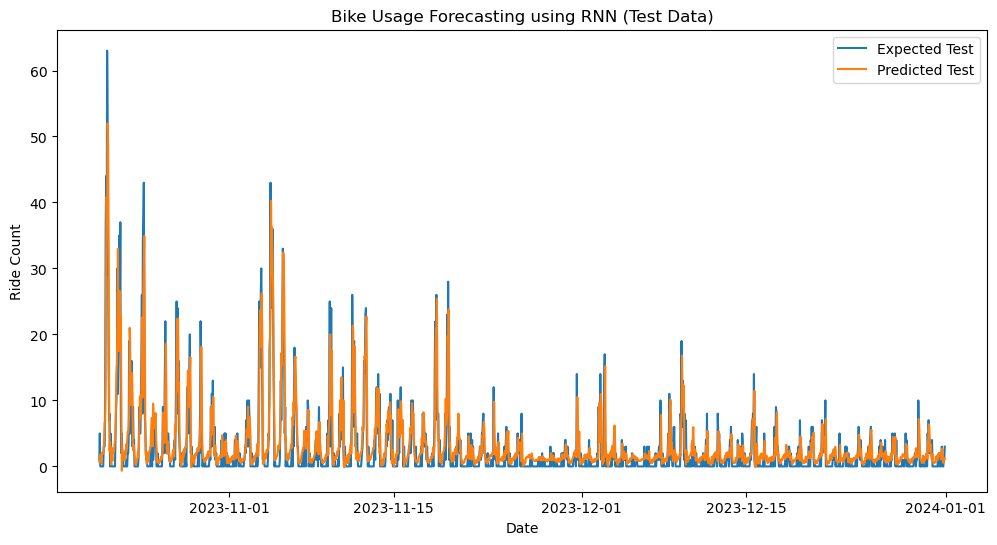

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(rnn_data.index[len(train_predict_rnn) + (look_back * 2) + 1:len(rnn_scaled) - 1], y_test_rnn[0], label='Expected Test')
plt.plot(rnn_data.index[len(train_predict_rnn) + (look_back * 2) + 1:len(rnn_scaled) - 1], test_predict_rnn, label='Predicted Test')
plt.title('Bike Usage Forecasting using RNN (Test Data)')
plt.xlabel('Date')
plt.ylabel('Ride Count')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#mse
rnn_mse = mean_squared_error(y_test_rnn[0], test_predict_rnn)
print(f"Mean Squared Error: {rnn_mse:.2f}")

#mae
rnn_mae = mean_absolute_error(y_test_rnn[0], test_predict_rnn)
print(f"Mean Absolute Error: {rnn_mae:.2f}")

Mean Squared Error: 11.61
Mean Absolute Error: 2.10


To Do!!

## LSTM

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6992/6992 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.0038
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step


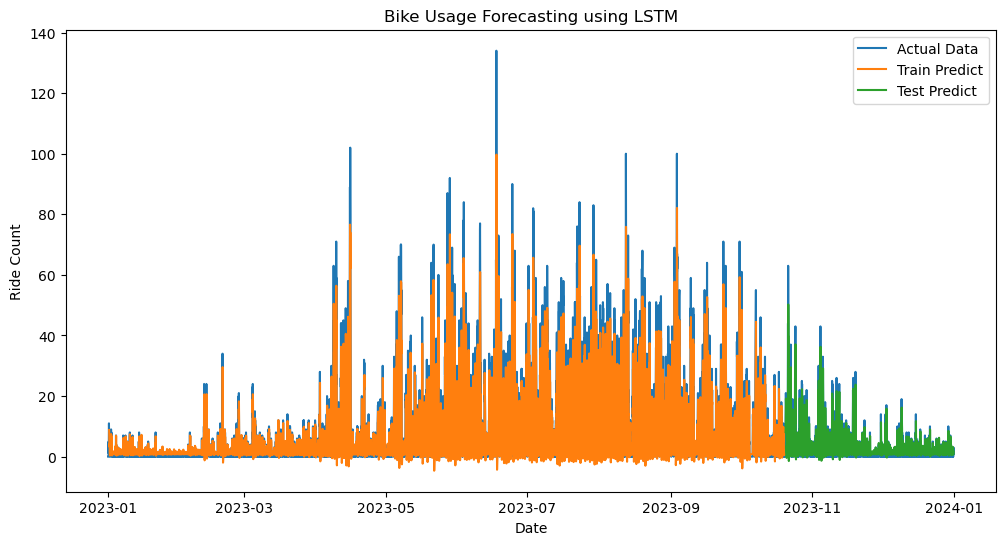

In [65]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

import matplotlib.pyplot as plt

# Prepare the data
data = combined_df[['started_at', 'ride_count']]
data.set_index('started_at', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create the training and test datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create the dataset with look_back
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Plot the results
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict) + look_back, :] = train_predict

test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1:len(scaled_data) - 1, :] = test_predict

plt.figure(figsize=(12, 6))
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual Data')
plt.plot(data.index, train_predict_plot, label='Train Predict')
plt.plot(data.index, test_predict_plot, label='Test Predict')
plt.title('Bike Usage Forecasting using LSTM')
plt.xlabel('Date')
plt.ylabel('Ride Count')
plt.legend()
plt.show()

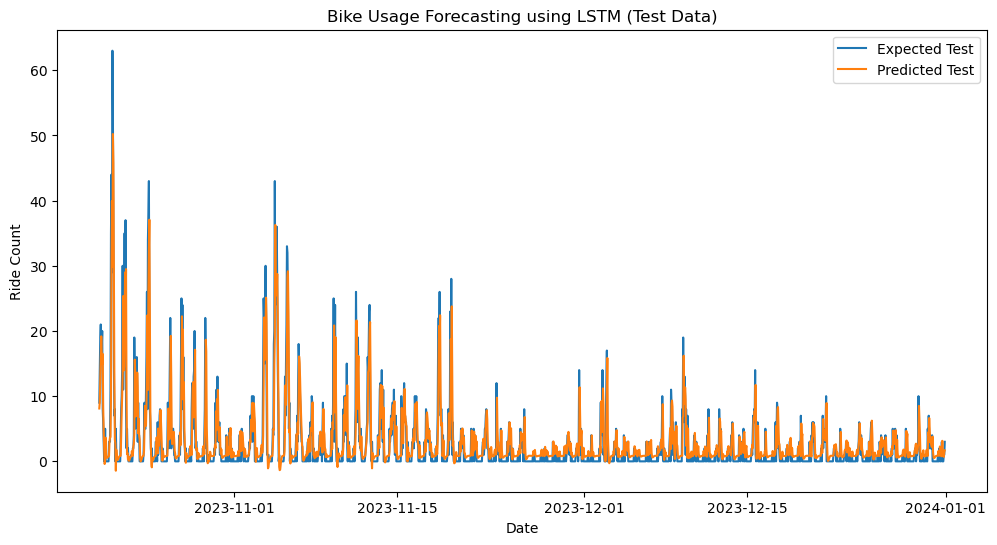

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(data.index[len(train_predict) + (look_back * 2) + 1:len(scaled_data) - 1], y_test[0], label='Expected Test')
plt.plot(data.index[len(train_predict) + (look_back * 2) + 1:len(scaled_data) - 1], test_predict, label='Predicted Test')
plt.title('Bike Usage Forecasting using LSTM (Test Data)')
plt.xlabel('Date')
plt.ylabel('Ride Count')
plt.legend()
plt.show()

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test[0], test_predict)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test[0], test_predict)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 12.81
Mean Absolute Error: 2.10
